In [219]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
%matplotlib ipympl

### Write coords file

In [199]:
data = np.genfromtxt(r'C:\Users\onix\Desktop\current_field', delimiter=' ', skip_header=2)
coords = data[:, [0, 1, 2]]

x = np.arange(0.6e-3,1.5e-3,0.1e-3)
y = np.arange(-0.4e-3,0.5e-3,0.1e-3)
z = np.arange(7.5e-3, 17.6e-3, 0.1e-3)
#12.5 pm 5

# with open(r'C:\Users\onix\Desktop\coords.pts', 'w') as coords_file:
#     for xval in x:
#         for yval in y:
#             for zval in z:
#                 s = f'{xval} {yval} {zval}\n'
#                 coords_file.write(s)

### Get Data

In [32]:
def get_data(file):
    data = np.genfromtxt(file, skip_header = 2)
    x_file = data[:,0]*1000
    x = sorted(set(x_file))
    y_file = data[:,1] * 1000
    y = sorted(set(y_file)) # distinct y values
    z_file = data[:,2] * 1000
    z = sorted(set(z_file)) # distinct z values
    B_file = data[:,3] * 10**4
    try:
        #B = B_file.reshape(len(x), len(y), len(z))
        B = B_file.reshape(len(y), len(z))
    except:
        print("1D B array")
        B = B_file
    
    if file ==  r'C:\Users\onix\Desktop\current_design_magB_over_full_xtl':
        B = B[B < 300]
    
    avg_B = np.mean(B)
    B_pp = np.max(B) - np.min(B)
    std_B = np.std(B)
    print(f'Average = {avg_B} G \t Peak to Peak = {B_pp} G \t Stdev = {std_B}')
    return x, y, z, B
# Current Field: Avg = 209 G, Peak to Peak = 3.3 G, FWHM = 1.6 G

### Old Designs

In [20]:
# get data, be mindful of which axis is which when we reshape B

# entire field plate gap is 0<z<25mm, -3mm<y<3mm
# beam path is 10mm<z<15mm, -0.4mm<y<0.4mm, as this E3 xtl has b-axis = z-axis length of 5mm. This assumes a beam waist of 0.8 mm
# initial setup: 10x80x100mm iron plates with their far side 66mm from xtl, where current SmCo magnets are, permeability of 70, 100x3x100 SmCo Magnets with near sides 43mm from xtl, which is the distance frmo xtl to thermal base

#file =  r'C:\Users\onix\Desktop\data1' # entire field plate gap, initial setup 

# from here on we look only at the beam path (although, the incorrect beam path)
#file =  r'C:\Users\onix\Desktop\data2' # beam path only, initial setup
#file =  r'C:\Users\onix\Desktop\data4' # beam path only, initial setup, permeability = 70,000


#file = r'C:\Users\onix\Desktop\data6' # perm = 70, elongated iron and moved them in to close all gaps, iron is now 89mm long, with y = -43mm and x = 50mm, -60mm
#file = r'C:\Users\onix\Desktop\data7' # perm = 70, took the above design and moved each iron piece 20mm outward. Made magnets bigger to keep a closed design
#file = r'C:\Users\onix\Desktop\data8' # above but moved the iron in 20mm from their initial positions. Kept magnets the same.
#file = r'C:\Users\onix\Desktop\data9' # moved the iron 10mm apart, kept SmCo sizes from above
#file = r'C:\Users\onix\Desktop\data10' # moved the iron 180mm apart, enlarged SmCo to keep a closed box  ## best so bar


#file = r'C:\Users\onix\Desktop\data11' # brought the SmCo in by 10cm each
#file = r'C:\Users\onix\Desktop\data13' #thickened iron
#file = r'C:\Users\onix\Desktop\data14' # above but permeability 70,000
#file = r'C:\Users\onix\Desktop\data15' # cylindrical cutout in the center, perm = 70,000
#file = r'C:\Users\onix\Desktop\data16' # cylindrical addition to the rectangular slabs, perm = 70,000
#file = r'C:\Users\onix\Desktop\data17' # cylindrical addition to the rectangular slabs, perm = 1
#file = r'C:\Users\onix\Desktop\data18' # cylindrical addition to the rectangular slabs, perm = 70
#file = r'C:\Users\onix\Desktop\data19' # cylindrical addition to the rectangular slabs, perm = 70, shrank the rectangular width, so the entire iron thing is further from xtl
#file = r'C:\Users\onix\Desktop\data21' # removed iron entirely, left with SmCo magnets 23mm above / below the origin 200x3x100mm

# current field has 2 G FWHH at across the crystal
#file = r'C:\Users\onix\Desktop\current_field' # now we start to look at the actual location of the xtl, 1 mm off center
#file = r'C:\Users\onix\Desktop\current_design_magB_over_full_xtl' # has FWHH of 5.3 G over the xtl. Although, this says we have a point at 21 kG on the xtl
#file = r'C:\Users\onix\Desktop\daniels_field'

# the two coordinates listed are the two that I keep at zero, while I vary the other across the beam path
#file = r'C:\Users\onix\Desktop\nmr_design_Bz_yz' # When y = z = 0 this design is quite good
#file = r'C:\Users\onix\Desktop\nmr_design_By_yz' # 0.2 G
#file = r'C:\Users\onix\Desktop\nmr_design_Bx_yz' # 0.5 G
#file = r'C:\Users\onix\Desktop\nmr_design_magB_yz' # FWHH of 0.06 G
#file = r'C:\Users\onix\Desktop\nmr_design_magB_xy' # horrible, FWHH of 1 G
#file = r'C:\Users\onix\Desktop\nmr_design_magB_xz' # fine, similar to yz plane
#file = r'C:\Users\onix\Desktop\nmr_design_beam_path' # gives 1 G FWHH over the xtl, avg B of 536 G

"""
Questions about the NMR design:
- Why are the 3 magnets necessary? They seemingly are not. Better homogeneity with three magnets joined into one. In their final design, they use one magnet per side, anyway.
- Why do my field strengths not agree with theirs? Probably the grade of SmCo.
- How are they calculating inhomogeneity?
- Why is this design so poor along one axis?
    - when you change z, bad things happen. Try moving magnets much closer and much farther to see what happens
"""

#file = r'C:\Users\onix\Desktop\nmr_design_one_magnet_each_beam_path' # FWHH of 0.9 G with avg of 541 G
#file = r'C:\Users\onix\Desktop\nmr_design_one_magnet_each_xy' # FWHH of 0.02
#file = r'C:\Users\onix\Desktop\nmr_design_one_magnet_each_xz' # kind of ugly, although mostly fine. FWHH is one box, so about zero
#file = r'C:\Users\onix\Desktop\nmr_design_one_magnet_each_yz' # same as above

#file = r'C:\Users\onix\Desktop\nmr_design_reduced_y' # reduced the y range to (-1,1) mm. This changed the FWHH from 0.9 to 0.7

#file = r'C:\Users\onix\Desktop\magnets_moved_50mm_away_xy' # field strength has dropped to 1.75 G; 0.05 G FWHH
#file = r'C:\Users\onix\Desktop\magnets_moved_50mm_away_beam_path' # 0.06 FWHH
#file = r'C:\Users\onix\Desktop\nmr_scaled_by_4_beam_path' # 1 G FWHH

'\nQuestions about the NMR design:\n- Why are the 3 magnets necessary? They seemingly are not. Better homogeneity with three magnets joined into one. In their final design, they use one magnet per side, anyway.\n- Why do my field strengths not agree with theirs? Probably the grade of SmCo.\n- How are they calculating inhomogeneity?\n- Why is this design so poor along one axis?\n    - when you change z, bad things happen. Try moving magnets much closer and much farther to see what happens\n'

In [75]:
# file = r'C:\Users\onix\Desktop\current_field_extended'
# data = np.genfromtxt(file, skip_header = 2)
# x_file = data[:,0]*1000
# x = sorted(set(x_file))
# y_file = data[:,1] * 1000
# y = sorted(set(y_file)) # distinct y values
# z_file = data[:,2] * 1000
# z = sorted(set(z_file)) # distinct z values

# x = np.arange(0.6e-3,1.4e-3,0.1e-3)
# y = np.arange(-0.4e-3,0.4e-3,0.1e-3)
# z = np.arange(2.5e-3, 12.5e-3, 0.1e-3)

# B_file = data[:,3] * 10**4
# B = B_file.reshape(len(x), len(y), len(z))

### New Designs

In [184]:
#file = r'C:\Users\onix\Desktop\big_magnets' #not trustworthy. not sure simulation finished
#file = r'C:\Users\onix\Desktop\smaller_big_magnets' # still not trustworthy
#file = r'C:\Users\onix\Desktop\even_smaller_magnets'
#file = r'C:\Users\onix\Desktop\even_smaller_magnets_centered'
#file = r'C:\Users\onix\Desktop\quarter_inch_thick'

#file = r'C:\Users\onix\Desktop\double_current_magnet_size' # centered magnets, doubled their y and z sizes, 915 G field, 16115 ppm
#file = r'C:\Users\onix\Desktop\current_field_centered' # Warning: simulation failed. Probably not trustworthy
#file = r'C:\Users\onix\Desktop\current_field_again'
file = r'C:\Users\onix\Desktop\b_vector'
"""
TODO:
Understand why B vector is not symmetric. file has 6 columns:" x, y, z, Bx, By, Bz. Contour plot shows that field is not symmetric. Tro to plot each component of B for z = 12.5mm, y = 0

"""

In [200]:
data = np.genfromtxt(file, skip_header = 1)
#x_file = data[:,0]*1000
#x = sorted(set(x_file))
#y_file = data[:,1] * 1000
#y = sorted(set(y_file)) # distinct y values
#z_file = data[:,2] * 1000
#z = sorted(set(z_file)) # distinct z values

B_x = data[:,3] * 10**4
B_x = B_x.reshape(len(x), len(y), len(z))

B_y = data[:,4] * 10**4
B_y = B_y.reshape(len(x), len(y), len(z))

B_z = data[:,5] * 10**4
B_z = B_z.reshape(len(x), len(y), len(z))

if file ==  r'C:\Users\onix\Desktop\current_design_magB_over_full_xtl':
    B = B[B < 300]

# avg_B = np.mean(B)
# B_pp = np.max(B) - np.min(B)
# std_B = np.std(B)
# print(f'Average = {avg_B} G \t Peak to Peak = {B_pp} G \t Stdev = {std_B}')

In [203]:
# change x,set y, z = 0 for Bz
zval = np.float64(12.5e-3)
index = np.where(z == zval)[0][0]

yval = np.float64(-5.421010862427522e-17)
index1 = np.where(y == yval)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [194]:
B_z.shape

(9, 9, 102)

In [192]:
B_z_z_y_fixed= B_z[:index,:index1,]

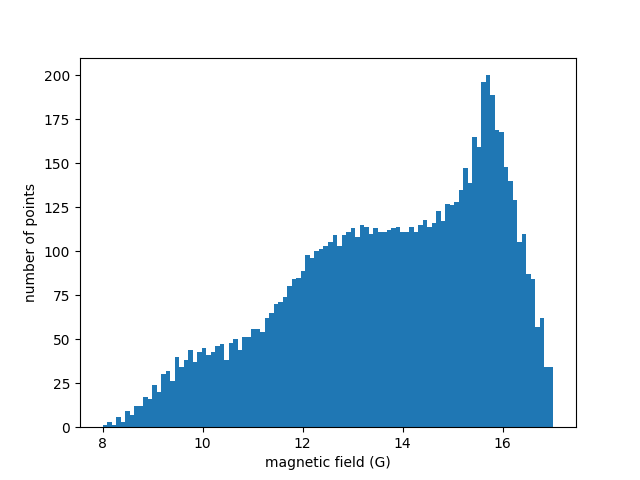

In [161]:
B_flat = B.flatten()

plt.figure()
plt.hist(B_flat, bins=100)
plt.xlabel('magnetic field (G)')
plt.ylabel('number of points')
plt.show()

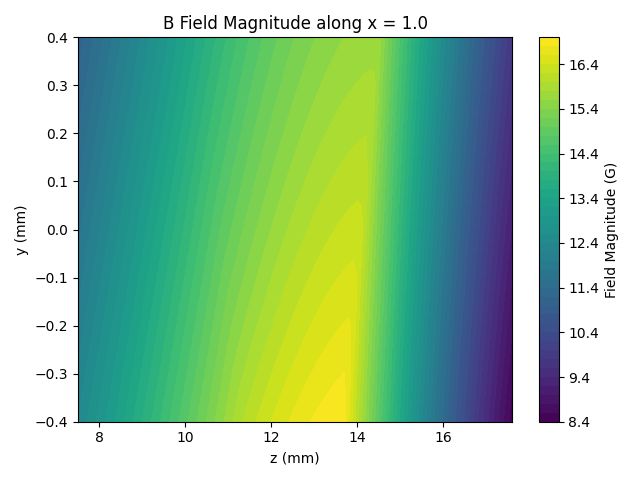

In [162]:
# Contour plot
xval = np.float64(1.0)
index = np.where(x == xval)[0][0]
B_x_slice = B[index,::]
fig, ax = plt.subplots()
cs = ax.contourf(z,y,B_x_slice, levels = 50)
ax.set_xlabel("z (mm)")
ax.set_ylabel("y (mm)")
ax.set_title(f"B Field Magnitude along x = {xval}")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Field Magnitude (G)')
plt.tight_layout()
plt.show()

In [121]:
# Contour plot
# yval = np.float64(0.0)
# index = np.where(y == yval)[0][0]
# B_x_slice = B[index,::]
# fig, ax = plt.subplots()
# cs = ax.contourf(z,y,B_x_slice, levels = 50)
# ax.set_xlabel("z (mm)")
# ax.set_ylabel("y (mm)")
# ax.set_title(f"B Field Magnitude along x = {xval}")
# cbar = fig.colorbar(cs)
# cbar.ax.set_ylabel('Field Magnitude (G)')
# plt.tight_layout()
# plt.show()

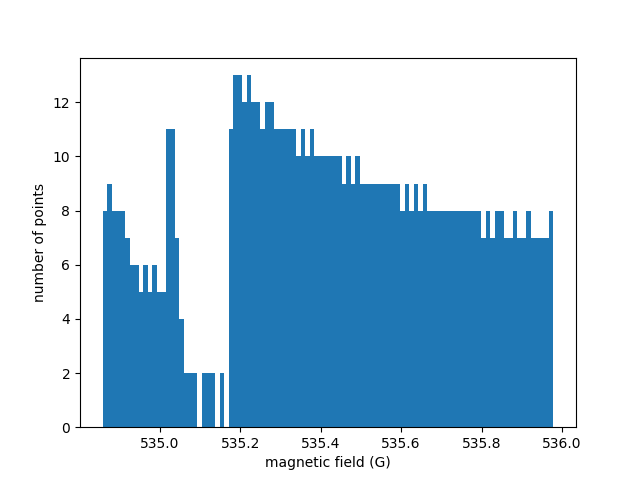

In [587]:
B_flat = B.flatten()

plt.figure()
plt.hist(B_flat, bins=100)
plt.xlabel('magnetic field (G)')
plt.ylabel('number of points')
plt.show()

### NMR design cross sections

In [3]:
yz = r'C:\Users\onix\Desktop\nmr_design_magB_yz' # FWHH of 0.06 G
xy = r'C:\Users\onix\Desktop\nmr_design_magB_xy' # horrible, FWHH of 1 G
xz = r'C:\Users\onix\Desktop\nmr_design_magB_xz' # fine, similar to yz plane

x_yz, y_yz, z_yz, B_yz = get_data(yz)
x_xy, y_xy, z_xy, B_xy = get_data(xy)
x_xz, y_xz, z_xz, B_xz = get_data(xz)

Average = 535.4535132370229 G 	 Peak to Peak = 0.5311636413169936 G 	 Stdev = 0.1007974141593509
Average = 535.4375866895552 G 	 Peak to Peak = 1.1204537652021145 G 	 Stdev = 0.3027606969033203
Average = 535.9989608810364 G 	 Peak to Peak = 2.205698694000489 G 	 Stdev = 0.5244719022437325


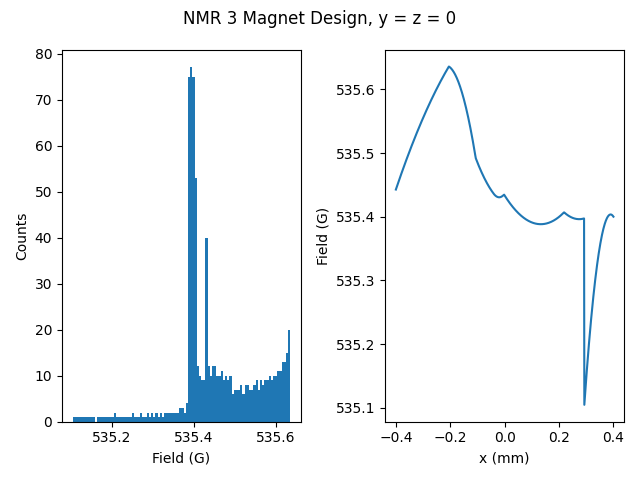

In [14]:
# yz 
B_yz_flat = B_yz.flatten()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(B_yz_flat, bins = 100)
ax1.set_xlabel("Field (G)")
ax1.set_ylabel("Counts")
ax2.plot(x_yz, B_yz_flat)
ax2.set_xlabel("x (mm)")
ax2.set_ylabel("Field (G)")
fig.suptitle("NMR 3 Magnet Design, y = z = 0")
plt.tight_layout()

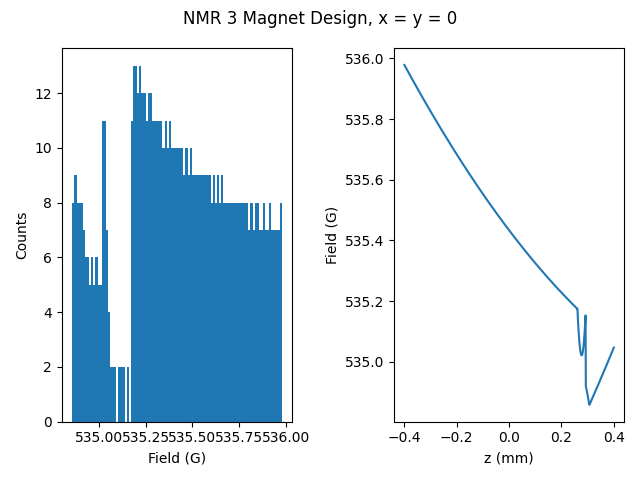

In [15]:
# xy 
B_xy_flat = B_xy.flatten()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(B_xy_flat, bins = 100)
ax1.set_xlabel("Field (G)")
ax1.set_ylabel("Counts")
ax2.plot(z_xy, B_xy_flat)
ax2.set_xlabel("z (mm)")
ax2.set_ylabel("Field (G)")
fig.suptitle("NMR 3 Magnet Design, x = y = 0")
plt.tight_layout()

In [158]:
10*1e6/168

59523.80952380953

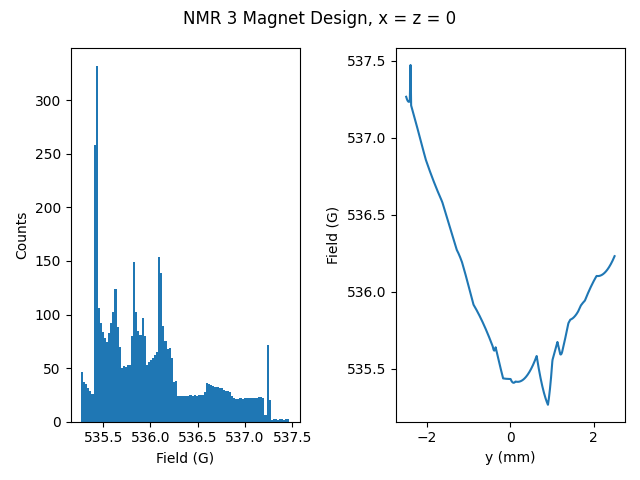

In [16]:
# xy 
B_xz_flat = B_xz.flatten()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(B_xz_flat, bins = 100)
ax1.set_xlabel("Field (G)")
ax1.set_ylabel("Counts")
ax2.plot(y_xz, B_xz_flat)
ax2.set_xlabel("y (mm)")
ax2.set_ylabel("Field (G)")
fig.suptitle("NMR 3 Magnet Design, x = z = 0")
plt.tight_layout()

In [29]:
B

array([208.2124716 , 208.22646236, 208.24041853, ..., 207.1808787 ,
       207.16694985, 207.15299574])

TypeError: Input z must be 2D, not 1D

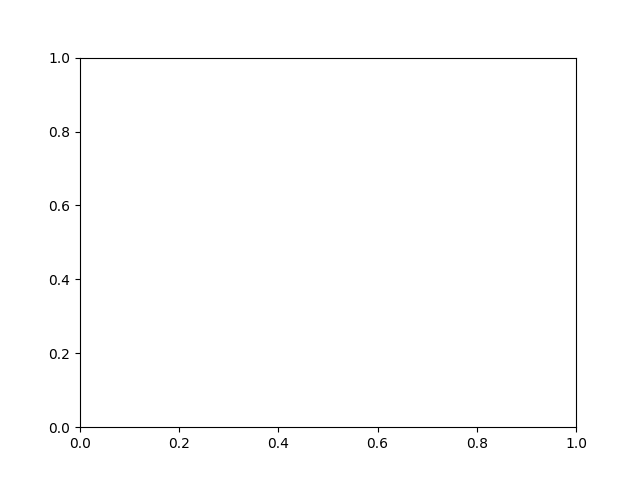

In [28]:
# Contour plot
fig, ax = plt.subplots()

cs = ax.contourf(z,y,B, levels = 50)
ax.set_xlabel("z (mm)")
ax.set_ylabel("y (mm)")
ax.set_title("B Field Magnitude along x = 0")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Field Magnitude (G)')
plt.tight_layout()
plt.show()

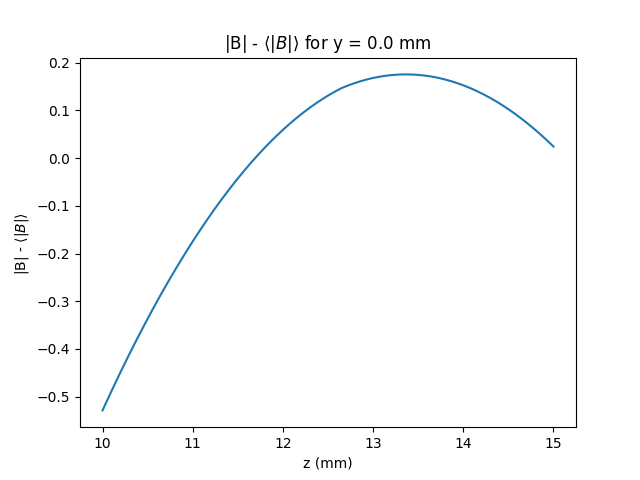

In [315]:
# Fix y and plot |B|(z)
y_val = np.float64(0)
index = np.where(y == y_val)[0][0]

B_y_section = B[index,:]

fig, ax = plt.subplots()
ax.plot(z, B_y_section - np.mean(B_y_section))
ax.set_xlabel("z (mm)")
ax.set_ylabel(r"|B| - $\langle |B| \rangle $ ")
ax.set_title(r"|B| - $\langle |B| \rangle $ " + f"for y = {y_val} mm");
plt.show()

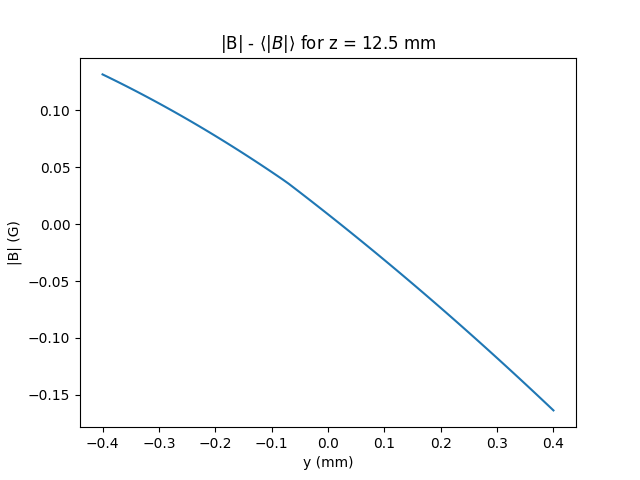

In [316]:
# Fix z and plot |B|(y)
z_val = np.float64(12.5)
index = np.where(z == z_val)[0][0]
B_z_section = B[:,index]

fig, ax = plt.subplots()
ax.plot(y, B_z_section - np.mean(B_z_section))
ax.set_xlabel("y (mm)")
ax.set_ylabel("|B| (G)")
ax.set_title(r"|B| - $\langle |B| \rangle $ " + f"for z = {z_val} mm");
plt.show()

### Testing Ansys with Current Loop

Take a ring of current of minor radius 0.05 mm and major radius 0.5 mm. Put 1 A through it. Export the $\vec{B}$ from -5 mm to 5 mm in steps of 0.1 mm along each axis.

In [253]:
file = r'C:\Users\onix\Desktop\current_loop'

# Possible source of error -- np.arange is subject to rounding errors. For example, in the below I get -1e-17 instead of 0. Perhaps this is messing with the mesh?
x = np.arange(-5,5.1,0.1)
y = np.arange(-5,5.1,0.1)
z = np.arange(-5,5.1,0.1)

data = np.genfromtxt(file, skip_header = 2)
Bx = data[:,3] * 10**4
Bx = B_x.reshape(len(x), len(y), len(z))

By = data[:,4] * 10**4
By = B_y.reshape(len(x), len(y), len(z))

Bz = data[:,5] * 10**4
Bz = B_z.reshape(len(x), len(y), len(z))

magB = np.sqrt(Bx**2 + By**2 + Bz**2)

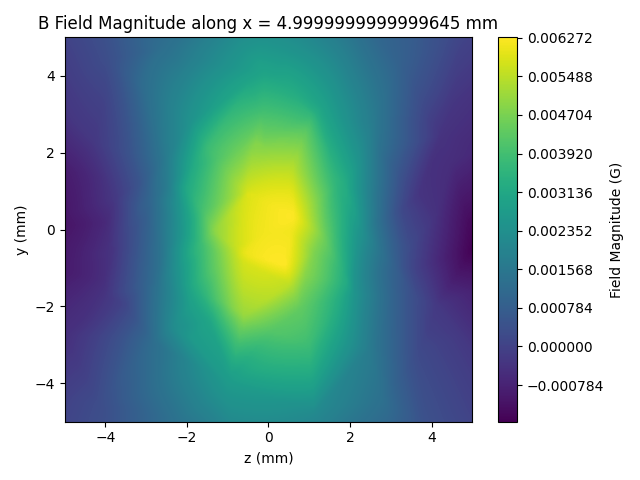

In [279]:
# Single Contour plot

index = 100 # 50 corresponds to x = 0 mm
magB_xslice = B_z[index,::]

fig, ax = plt.subplots()

cs = ax.contourf(z,y,magB_xslice, levels = 1000)
ax.set_xlabel("z (mm)")
ax.set_ylabel("y (mm)")
ax.set_title(f"B Field Magnitude along x = {x[index]} mm")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Field Magnitude (G)')
plt.tight_layout()
plt.show()

In [319]:
magB_yslice[0].shape

(101, 101)

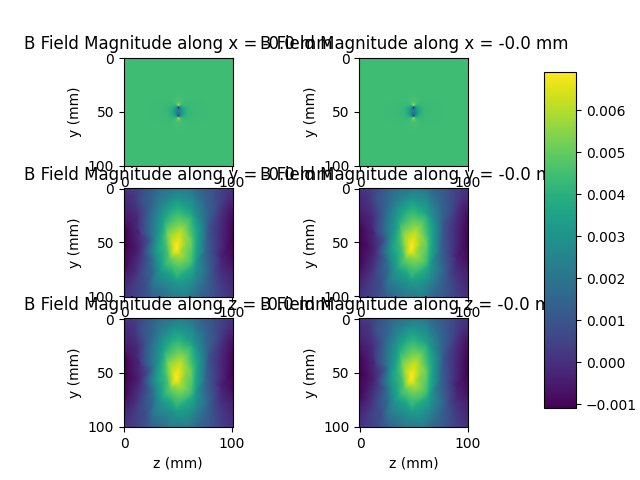

In [328]:
# Plot symmetric contour plots

"""
When taking slices near the current loop the two plots look the same, and both are symmetric. Going further away the two plots begin to look different, and each becomes asymmetric.
TODO: the way I am wrapping the B array is not correct. The x and y axes should be symmetric, not y and z.
"""
index = 50 # 50 corresponds to x = 0 mm
reverse_index = 100 - index

# TODO: why do the y and z slices need the [0] and not the x? Am I slicing correctly?
magB_xslice = B_z[index,::]
magB_reverse_xslice = B_z[reverse_index,::]
magB_yslice = B_z[:index,:][0]
magB_reverse_yslice = B_z[:reverse_index,:][0]
magB_zslice = B_z[::index,][0]
magB_reverse_zslice = B_z[::reverse_index,][0]

data_list = [[magB_xslice, magB_reverse_xslice],[magB_yslice, magB_reverse_yslice], [magB_zslice, magB_reverse_zslice]]

fig, axes = plt.subplots(nrows=3, ncols=2)
for i in range(3):
    for j in range(2):
        im = axes[i][j].imshow(data_list[i][j])
        axes[i][j].set_xlabel('z (mm)')
        axes[i][j].set_ylabel('y (mm)')
        if i == 0: #looking at x slices
            if j == 0:
                axes[i][j].set_title(f"B Field Magnitude along x = {round(x[index],3)} mm")
            else:
                axes[i][j].set_title(f"B Field Magnitude along x = {round(x[reverse_index],3)} mm")
        if i == 1: #looking at x slices
            if j == 0:
                axes[i][j].set_title(f"B Field Magnitude along y = {round(x[index],3)} mm")
            else:
                axes[i][j].set_title(f"B Field Magnitude along y = {round(x[reverse_index],3)} mm")
        if i == 2: #looking at x slices
            if j == 0:
                axes[i][j].set_title(f"B Field Magnitude along z = {round(x[index],3)} mm")
            else:
                axes[i][j].set_title(f"B Field Magnitude along z = {round(x[reverse_index],3)} mm")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]) #these params are just the size of the colorbar on the right
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_ylabel('Field Magnitude (G)')
plt.show()